In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader.data as web

In [ ]:
!pip install yfinance --upgrade --no cache-dir
!pip install yfinance
import yfinance as yf
yf.pdr_override()

#Obtendo dados do IBOVSPA


In [6]:
tickers = ['^BVSP', 'USDBRL=X']
carteira = web.get_data_yahoo(tickers, start='2007-01-01')['Close']

[*********************100%***********************]  2 of 2 completed


In [7]:
carteira.head()

,USDBRL=X,^BVSP
Date,,
2007-01-01,2.1325,NaN
2007-01-02,2.1310,45383.0
2007-01-03,2.1345,44445.0
2007-01-04,2.1390,44020.0
2007-01-05,2.1470,42245.0


In [8]:
#removendo dados faltantes
carteira=carteira.dropna()
carteira

,USDBRL=X,^BVSP
Date,,
2007-01-02,2.1310,45383.00000
2007-01-03,2.1345,44445.00000
2007-01-04,2.1390,44020.00000
2007-01-05,2.1470,42245.00000
2007-01-08,2.1465,42830.00000
...,...,...
2020-08-12,5.3804,102118.00000
2020-08-13,5.4350,100461.00000
2020-08-14,5.3670,101353.00000


In [9]:
carteira.columns=['DOLAR', 'IBOV']
carteira

,DOLAR,IBOV
Date,,
2007-01-02,2.1310,45383.00000
2007-01-03,2.1345,44445.00000
2007-01-04,2.1390,44020.00000
2007-01-05,2.1470,42245.00000
2007-01-08,2.1465,42830.00000
...,...,...
2020-08-12,5.3804,102118.00000
2020-08-13,5.4350,100461.00000
2020-08-14,5.3670,101353.00000


#Resultados

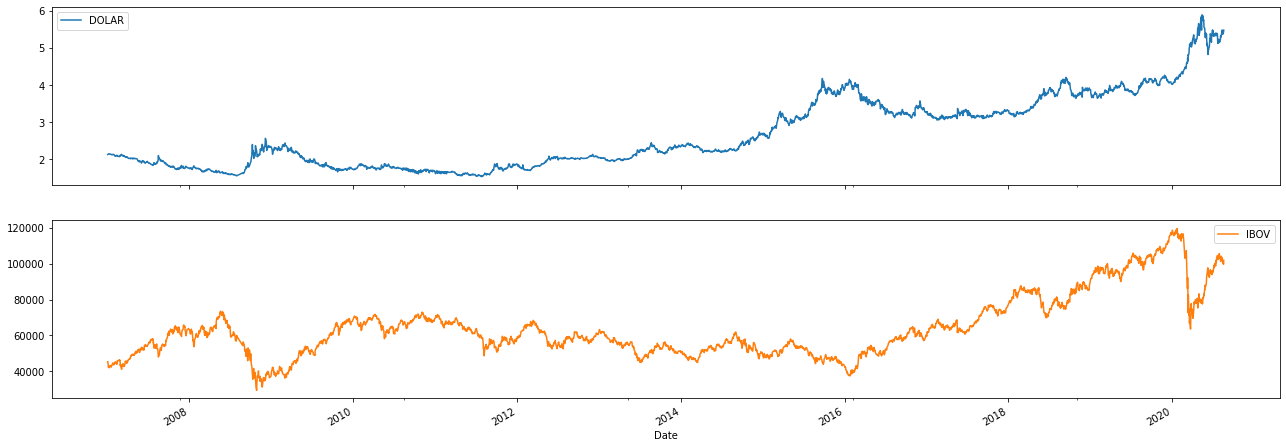

In [10]:
carteira.plot(subplots=True, figsize=(22, 8));

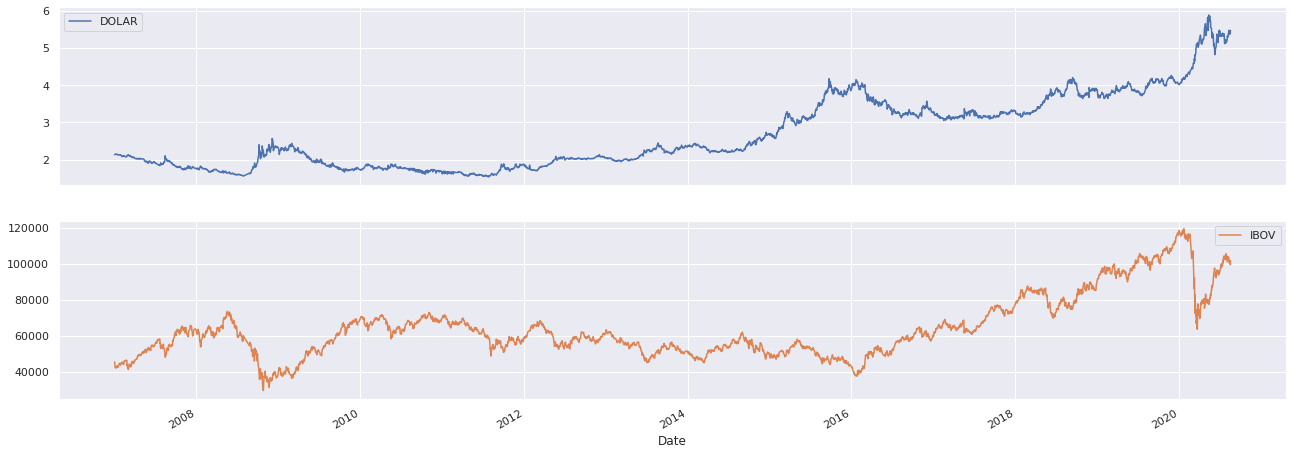

In [11]:
#melhorando o grafico
import seaborn as sns
sns.set()
carteira.plot(subplots=True, figsize=(22,8));

In [12]:
carteira.corr()

,DOLAR,IBOV
DOLAR,1.00000,0.52632
IBOV,0.52632,1.00000


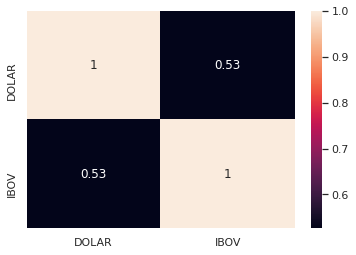

In [13]:
sns.heatmap(carteira.corr(), annot=True);

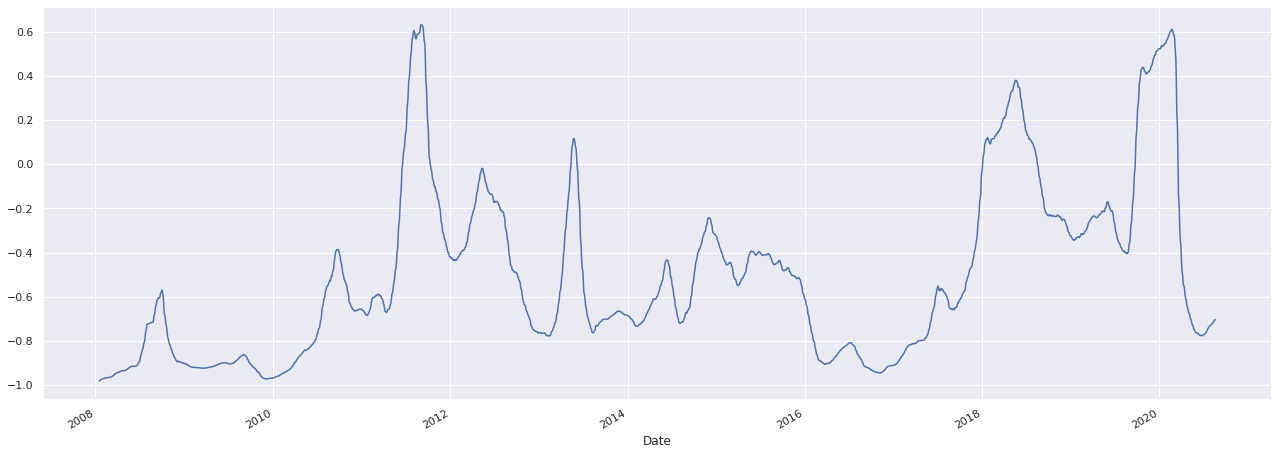

In [14]:
carteira['DOLAR'].rolling(252).corr(carteira['IBOV']).plot(figsize=(22,8));

In [15]:
carteira['IBOV_DORARIZADO'] = (carteira['IBOV'] / carteira['DOLAR'])
carteira

,DOLAR,IBOV,IBOV_DORARIZADO
Date,,,
2007-01-02,2.1310,45383.00000,21296.573959
2007-01-03,2.1345,44445.00000,20822.206345
2007-01-04,2.1390,44020.00000,20579.710732
2007-01-05,2.1470,42245.00000,19676.291819
2007-01-08,2.1465,42830.00000,19953.411504
...,...,...,...
2020-08-12,5.3804,102118.00000,18979.629129
2020-08-13,5.4350,100461.00000,18484.084831
2020-08-14,5.3670,101353.00000,18884.478862


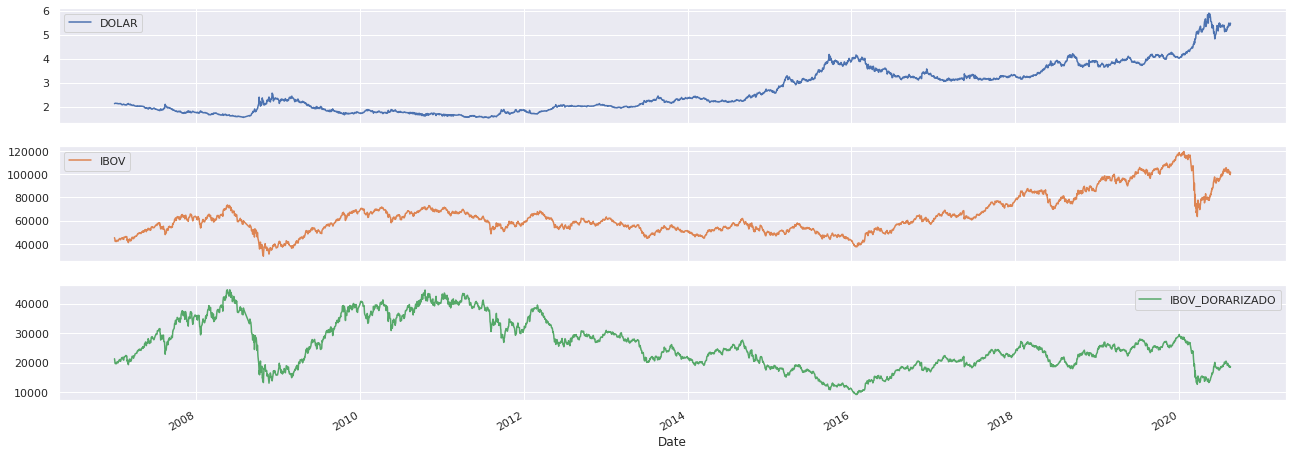

In [16]:
carteira.plot(subplots=True, figsize=(22, 8));